# Benefit of MPL System Modelling
True, Nominal, MPL model testing

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import cost_function_1, initial_values_init, actuator_selection_cost_1, plot_actuator_selection_2, simulation_actuator_selection, plot_simulation

## Code

In [2]:
test_set = 'System Model 1'
S_True = sys_from_file(test_set + ' True')
# system_display_matrix(S_True)
initial_values = initial_values_init(S_True, T=50)

System read from file @ system_model/System Model 1 True.pickle 



## Control of True System based on Nominal System model

##### Run Code

In [3]:
S_Nominal = sys_from_file(test_set + ' Nominal')

System read from file @ system_model/System Model 1 Nominal.pickle 



In [4]:
ret1_nom = actuator_selection_cost_1(S_Nominal, initial_values=initial_values)
S_Nominal = dc(ret1_nom['system'])
S_True1 = dc(S_True)
S_True1['B'] = dc(S_Nominal['B'])
ret2_nom = simulation_actuator_selection(S_Nominal, S_True1, initial_values=initial_values)

##### Display Output

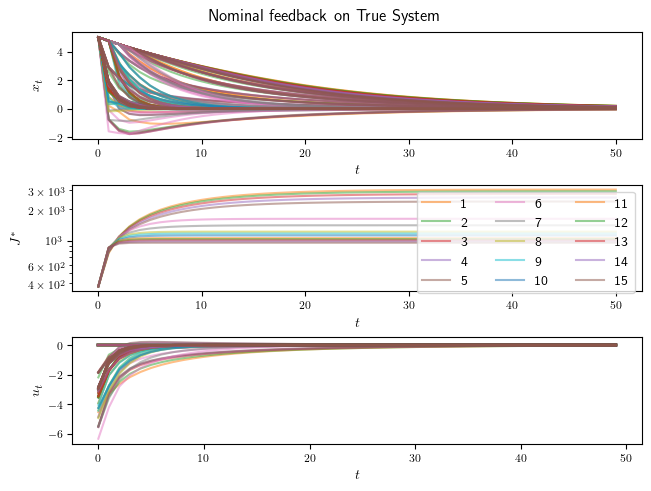

In [5]:
plot_simulation(display_data=ret2_nom, fname='Nominal feedback on True System')

## Control of True System based on MPL System model

##### Run Code

In [6]:
S_MPL = sys_from_file(test_set + ' MPL')

System read from file @ system_model/System Model 1 MPL.pickle 



In [7]:
ret1_MPL = actuator_selection_cost_1(S_MPL, initial_values=initial_values)
S_MPL = dc(ret1_MPL['system'])
S_True2 = dc(S_True)
S_True2['B'] = dc(S_MPL['B'])
ret2_MPL = simulation_actuator_selection(S_MPL, S_True2, initial_values=initial_values)

##### Display Output

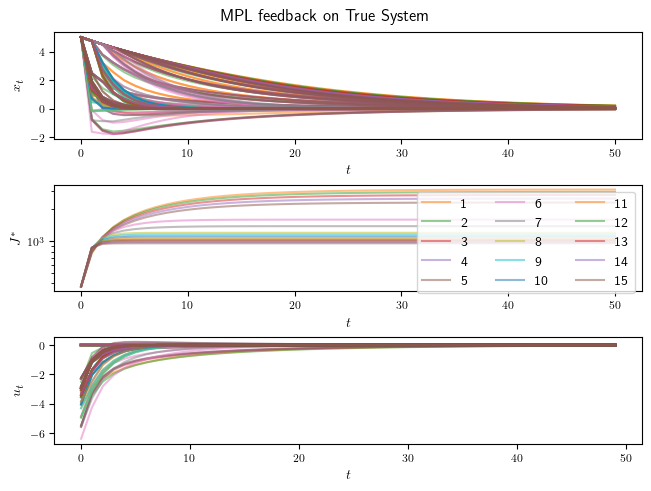

In [8]:
plot_simulation(display_data=ret2_MPL, fname='MPL feedback on True System')

## Comparisons

In [9]:
if np.allclose(S_Nominal['B'], S_MPL['B']):
    print('Both control sets are close/equal')
else:
    print('Cost control sets are different')

print('Nominal B:\n', S_Nominal['B'])
print('MPL B:\n', S_MPL['B'])
    
print('\n')

print('Cost change with |S|:\n')
for i in ret2_nom['costs']:
    print('|S|:',i, ' => Nom:', ret2_nom['costs'][i][-1], ' | MPL:', ret2_MPL['costs'][i][-1])

Cost control sets are different
Nominal B:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
MPL B:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

## Self-Control Tests

### Testing Nominal control on itself

##### Run Code

In [10]:
ret3_nom = simulation_actuator_selection(S_Nominal, S_Nominal)

##### Display Output

In [11]:
# plot_actuator_selection_1(S_Nominal['B'], ret1_nom['cost_trend'], ret1_nom['time_trend'], ret1_nom['check_trend'], fname='Nominal Actuator Selection')

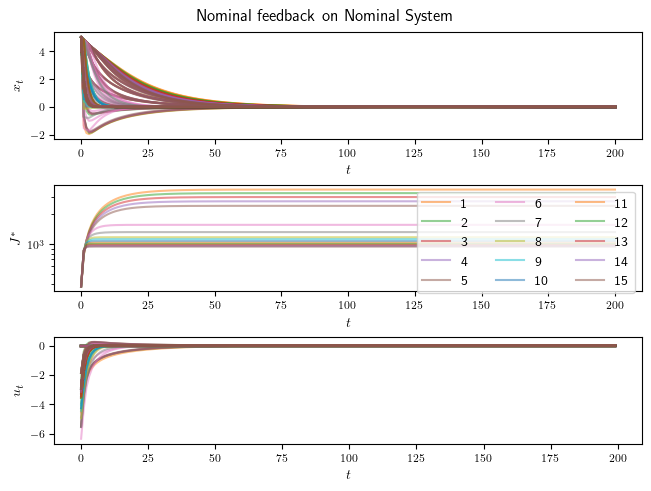

|S|: 1  =>  3532.6201848994797
|S|: 2  =>  3253.8387441199225
|S|: 3  =>  2971.197657347708
|S|: 4  =>  2693.392720523365
|S|: 5  =>  2423.913920066549
|S|: 6  =>  1561.0855376182203
|S|: 7  =>  1319.8654670652327
|S|: 8  =>  1171.5105158411773
|S|: 9  =>  1120.8281616019005
|S|: 10  =>  1069.8430470314343
|S|: 11  =>  1030.391417971922
|S|: 12  =>  1005.0375770199415
|S|: 13  =>  979.6897966701054
|S|: 14  =>  954.1428556193803
|S|: 15  =>  944.5536204611377


In [12]:
plot_simulation(display_data=ret3_nom, fname='Nominal feedback on Nominal System')
for i in ret3_nom['costs']:
    print('|S|:',i, ' => ', ret3_nom['costs'][i][-1])

### Testing MPL control on itself

##### Run Code

In [13]:
ret3_MPL = simulation_actuator_selection(S_MPL, S_MPL)

##### Display Output

In [14]:
# plot_actuator_selection_1(S_MPL['B'], ret1_MPL['cost_trend'], ret1_MPL['time_trend'], ret1_MPL['check_trend'], fname='MPL Actuator Selection')

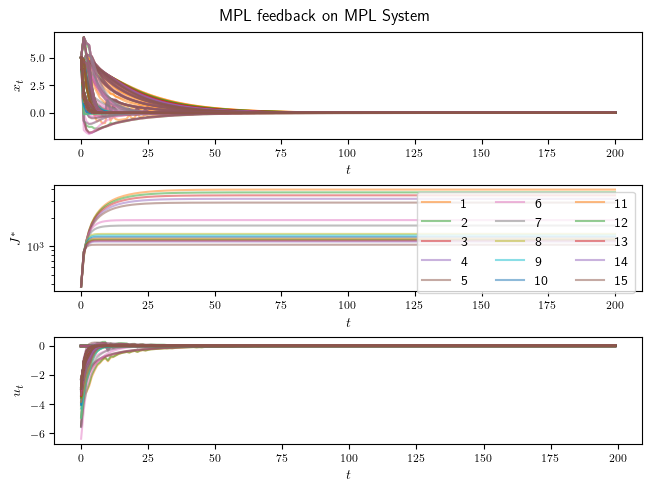

|S|: 1  =>  3956.5542045283687
|S|: 2  =>  3695.624835281722
|S|: 3  =>  3438.86361221777
|S|: 4  =>  3159.950272484972
|S|: 5  =>  2882.62949912934
|S|: 6  =>  1882.967895853369
|S|: 7  =>  1649.3439703495892
|S|: 8  =>  1345.6705439955626
|S|: 9  =>  1294.937281972935
|S|: 10  =>  1245.6260020453633
|S|: 11  =>  1197.0054653705797
|S|: 12  =>  1168.9559829498492
|S|: 13  =>  1143.6014544668844
|S|: 14  =>  1117.9292224971484
|S|: 15  =>  1034.2149172060567


In [15]:
plot_simulation(display_data=ret3_MPL, fname='MPL feedback on MPL System')
for i in ret3_MPL['costs']:
    print('|S|:',i, ' => ', ret3_MPL['costs'][i][-1])

## Run Complete

In [16]:
print('Run Complete')

Run Complete
